In [1]:
!pip install laspy==1.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 KB 6.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import laspy

# Open the LAS file in read mode
in_file = laspy.file.File("/content/drive/MyDrive/broken.las", mode="r")

# Access point data
x = in_file.x
y = in_file.y
z = in_file.z
intensity = in_file.intensity
classification = in_file.classification

# Close the LAS file
in_file.close()

In [6]:
import numpy as np

x1=x.reshape(-1,1)
y1=y.reshape(-1,1)
z1=z.reshape(-1,1)

m=np.hstack((x1,y1,z1))

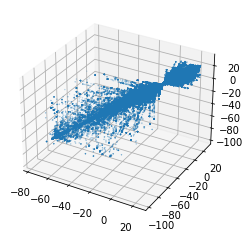

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=0.1)
plt.show()

In [8]:
m = m.T

<h4>To complete the unscrambling operation, we performed all possible permutations of the x, y and z axes </h4>


(3, 7098039)
[[-0.531 -0.495 -0.546 ... -0.469 -0.482 -0.498]
 [-0.519 -0.482 -0.532 ... -0.474 -0.488 -0.502]
 [-0.507 -0.469 -0.516 ... -0.478 -0.492 -0.508]]
(3, 7098039)
[[-0.531 -0.495 -0.546 ... -0.469 -0.482 -0.498]
 [-0.507 -0.469 -0.516 ... -0.478 -0.492 -0.508]
 [-0.519 -0.482 -0.532 ... -0.474 -0.488 -0.502]]
(3, 7098039)
[[-0.519 -0.482 -0.532 ... -0.474 -0.488 -0.502]
 [-0.531 -0.495 -0.546 ... -0.469 -0.482 -0.498]
 [-0.507 -0.469 -0.516 ... -0.478 -0.492 -0.508]]
(3, 7098039)
[[-0.519 -0.482 -0.532 ... -0.474 -0.488 -0.502]
 [-0.507 -0.469 -0.516 ... -0.478 -0.492 -0.508]
 [-0.531 -0.495 -0.546 ... -0.469 -0.482 -0.498]]
(3, 7098039)
[[-0.507 -0.469 -0.516 ... -0.478 -0.492 -0.508]
 [-0.531 -0.495 -0.546 ... -0.469 -0.482 -0.498]
 [-0.519 -0.482 -0.532 ... -0.474 -0.488 -0.502]]
(3, 7098039)
[[-0.507 -0.469 -0.516 ... -0.478 -0.492 -0.508]
 [-0.519 -0.482 -0.532 ... -0.474 -0.488 -0.502]
 [-0.531 -0.495 -0.546 ... -0.469 -0.482 -0.498]]


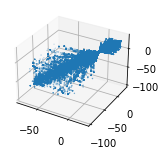

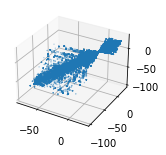

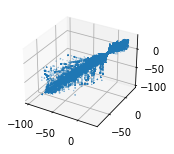

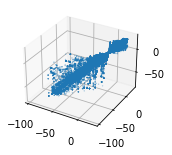

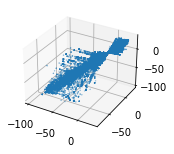

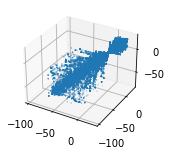

In [9]:
import itertools
import matplotlib.pyplot as plt
permutations = itertools.permutations(range(3), 2)

k=0
for i, j in permutations:
      k+=1
      permuted_matrix= np.hstack ((m[i,:].reshape(-1,1), m[j,:].reshape(-1,1), m[3-i-j,:].reshape(-1,1)))
      permuted_matrix= permuted_matrix.T
      #permuted_matrix.reshape(3, x1.shape[0])
      print(permuted_matrix.shape)
      print(permuted_matrix)
      #plt.subplot(3,2,k)
      fig = plt.figure(figsize=(15,8))
      ax = fig.add_subplot(3,2,k, projection='3d')
      ax.scatter(permuted_matrix[0,:], permuted_matrix[1,:], permuted_matrix[2,:], s=0.1)
plt.show()


In [10]:
np.save('m.npy', m)

In [11]:
!pip install --upgrade laspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for laspy: filename=laspy-2.4.1-py3-none-any.whl size=68063 sha256=90f5d971d5057fe0472139292999854ddd0679f29291f554c5b9f252ee886f1d
  Stored in directory: /root/.cache/pip/wheels/b7/84/b9/28a55f13245e29f4bee5274790ace34180da34cf230679fcf3
Successfully built laspy
  Attempting uninstall: laspy
    Found existing installation: laspy 1.7.0
    Uninstalling laspy-1.7.0:
      Successfully uninstalled laspy-1.7.0


In [1]:
import laspy
print(laspy.__version__)

2.4.1


In [2]:
import laspy
import numpy as np
import itertools

In [3]:
m=np.load('m.npy')

In [4]:
header = laspy.LasHeader(point_format=3, version="1.2")

permutations = itertools.permutations(range(3), 2)

k=0
for i, j in permutations:
      k+=1
      permuted_matrix= np.hstack ((m[i,:].reshape(-1,1), m[j,:].reshape(-1,1), m[3-i-j,:].reshape(-1,1)))
      permuted_matrix= permuted_matrix.T

      with laspy.open("/content/permuted"+str(k)+".las", mode="w", header=header) as writer:
          point_record = laspy.ScaleAwarePointRecord.zeros(m.shape[1], header=header)
          point_record.x = permuted_matrix[0,:]
          point_record.y = permuted_matrix[1,:]
          point_record.z = permuted_matrix[2,:]

          writer.write_points(point_record)

<h4> We choose the permutation of the x and z axes to demonstrate the results. </h4>

The point cloud box dimensions:

*   Length: 175.14493232353215
*   Width: 92.1575685454657
*   Height: 72.2194549606589

The total number of points: 7098039 </br> </br>

A screenshot of the corrected point cloud: </br>
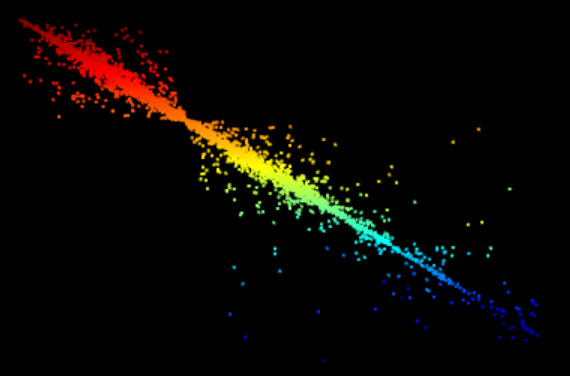

In [8]:
import laspy
import numpy as np


# Open the LAS file in read mode
in_file1 = laspy.file.File("/content/permuted6.las", mode="r")

# Access point data
x = in_file1.x
y = in_file1.y
z = in_file1.z

# Compute the point cloud box dimensions
covariance_matrix = np.cov(np.vstack([x, y, z]))
eigvalues, eigvectors = np.linalg.eig(covariance_matrix)
box_dimensions = [np.ptp(np.dot((np.vstack([x, y, z])).T, eigvectors[:, i])) for i in range(3)]
print("The point cloud box dimensions (Length, Width, Height): ", box_dimensions)

# Compute the total number of points
num_points = in_file1.points.shape[0]
print("The total number of points: ", num_points)

# Close the LAS file
in_file1.close()

The point cloud box dimensions (Length, Width, Height):  [175.14493232353215, 92.1575685454657, 72.2194549606589]
The total number of points:  7098039
